In this chapter, we will do these:

	1. perform Principal Components Analysis and Clustering (k-means & hierarchical clustering) in R code. 
	2. explore why we get different principal components when we use prcomp and PCA (FactoMineR package) functions.
	3. visualise output of PCA in different ways.

## Loading packages

In [1]:
library(FactoMineR) # for PCA function
library(ggplot2) # for factoextra
library(factoextra) # visualize result from PCA
library(corrplot) # for cos2 in PCA results
library(ggsci) # platte from sci

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.92 loaded



## Principal Components Analysis

### data processing
In this part, we perform PCA on the USArrests data set, which is part of the base R package. The rows of the data set contain the fifty states, in alphabetical order.

In [2]:
states <- row.names(USArrests)
head(states)
head(USArrests)

# check the means and standard deviations of all variables
apply(X = USArrests, MARGIN = 2, FUN = mean)
apply(X = USArrests, MARGIN = 2, FUN = sd)

[1] "Alabama"    "Alaska"     "Arizona"    "Arkansas"   "California"
[6] "Colorado"

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

### get principal component using procomp function

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

[1] 50  4

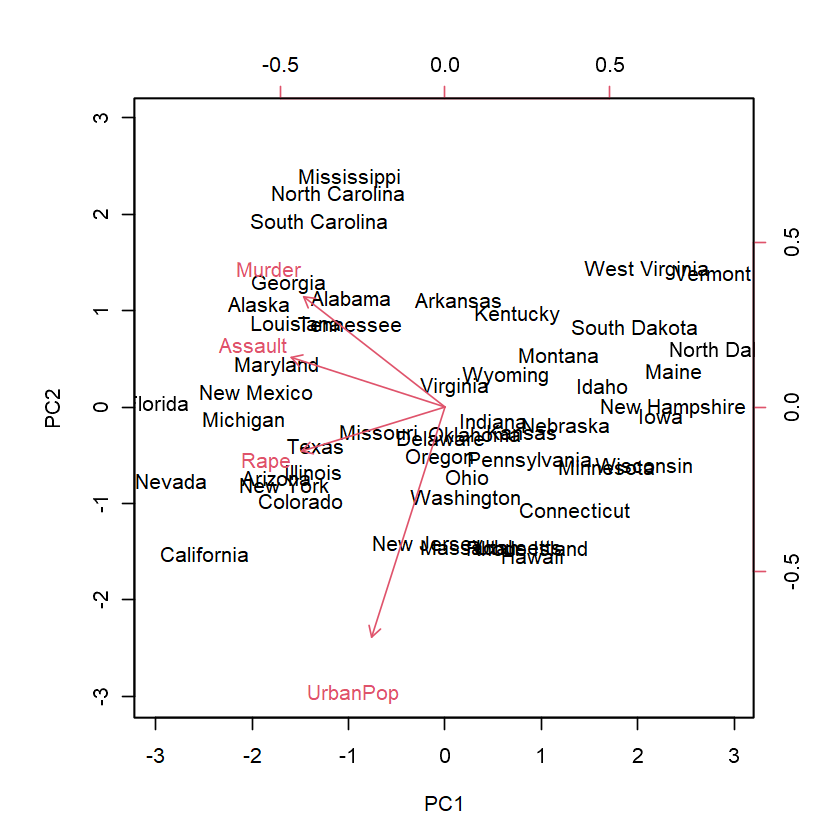

[1] 0.62006039 0.24744129 0.08914080 0.04335752

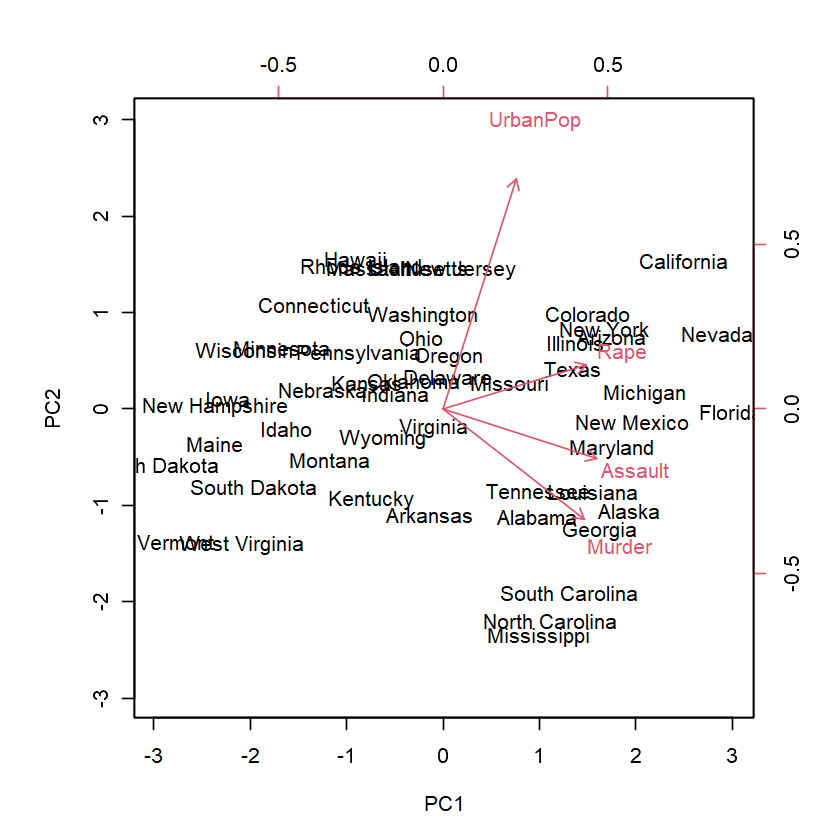

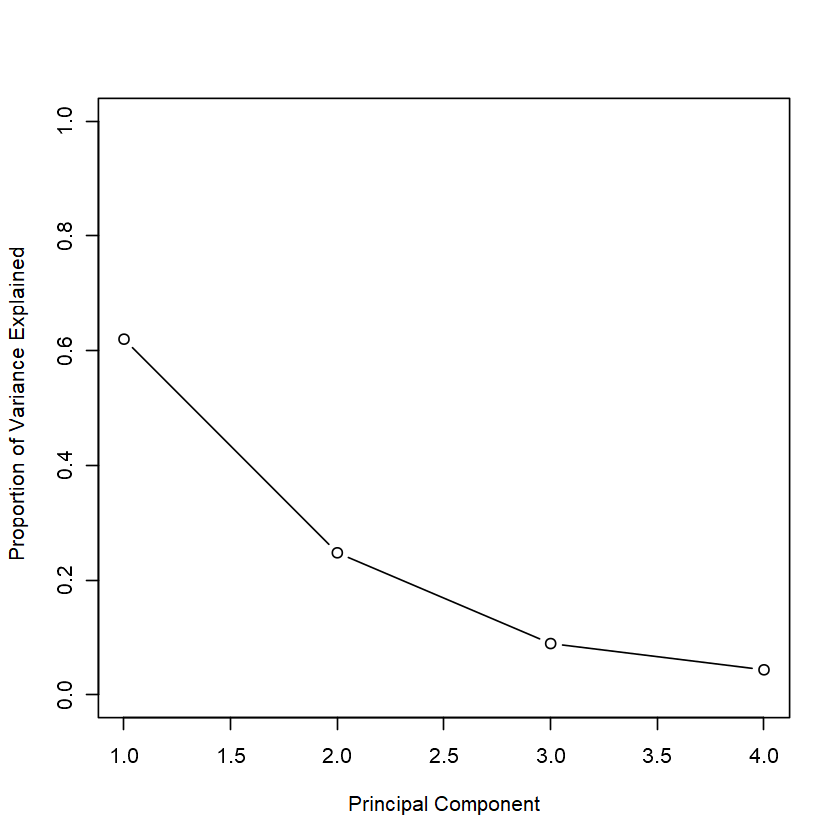

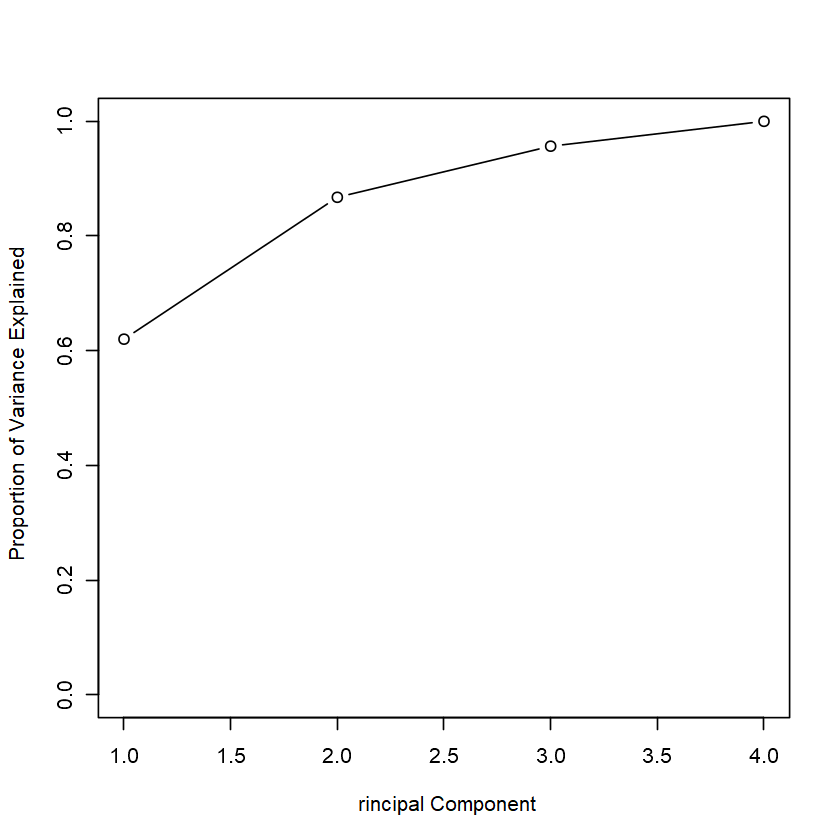

In [3]:
# stadardise the variables to have mean zero and standard deviation one 
#   before performing PCA
pca_out <- prcomp(USArrests, scale = T)
names(pca_out)
## 'sdev' is the deviation of principal component
pca_out$sdev
## 'rotation' means loading vectors (i.e. eigenvectors)
pca_out$rotation
## 'center' and 'scale' components correspond to the means and standard 
##   deviations of the variables that were used for scaling piror to 
##   implementing PCA
pca_out$center
pca_out$scale
## 'x' is the pricipal component score vectors
dim(pca_out$x)


# biplot first two principal components
## scale=0 ensures that the arrows are scaled to represent the loadings
biplot(pca_out, scale = 0) 
## reverse to get Figure 10.1 in book
pca_out$rotation <- - pca_out$rotation
pca_out$x <- - pca_out$x
biplot(pca_out, scale = 0)

# compute the proportion of variance explained by each principal component
pve <- pca_out$sdev ^ 2 / sum(pca_out$sdev^2)
pve
## plot the PVE of each component, as well as the cumulative PVE
plot(pve, xlab = "Principal Component",
    ylab = "Proportion of Variance Explained",
    ylim = c(0, 1), type = "b")
plot(cumsum(pve), xlab = " rincipal Component",
    ylab = "Proportion of Variance Explained",
    ylim = c(0, 1), type = "b")

### compute pricinpal component by PCA function

[1] "eig"  "var"  "ind"  "svd"  "call"

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.4802416,62.006039,62.00604
comp 2,0.9897652,24.744129,86.75017
comp 3,0.3565632,8.914080,95.66425
comp 4,0.1734301,4.335752,100.00000


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.4802416,62.006039,62.00604
Dim.2,0.9897652,24.744129,86.75017
Dim.3,0.3565632,8.914080,95.66425
Dim.4,0.1734301,4.335752,100.00000


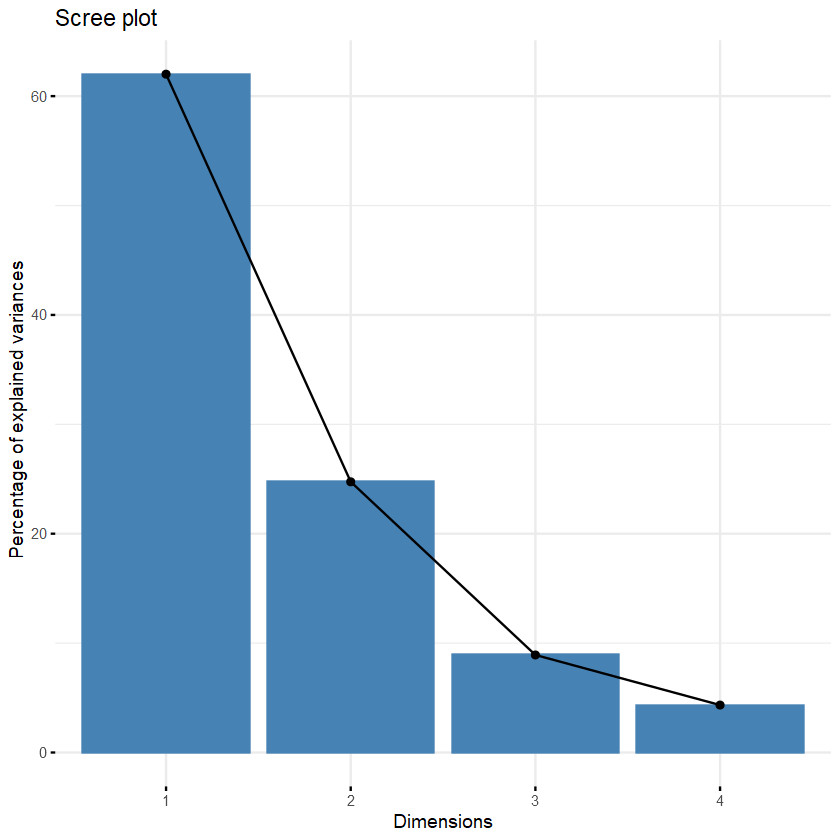

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

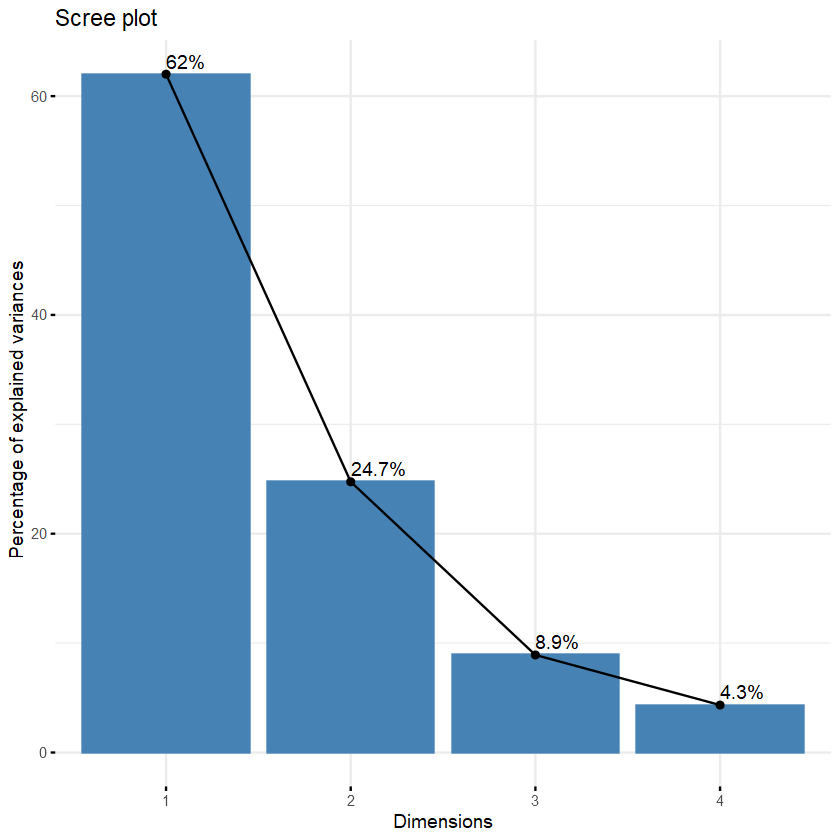

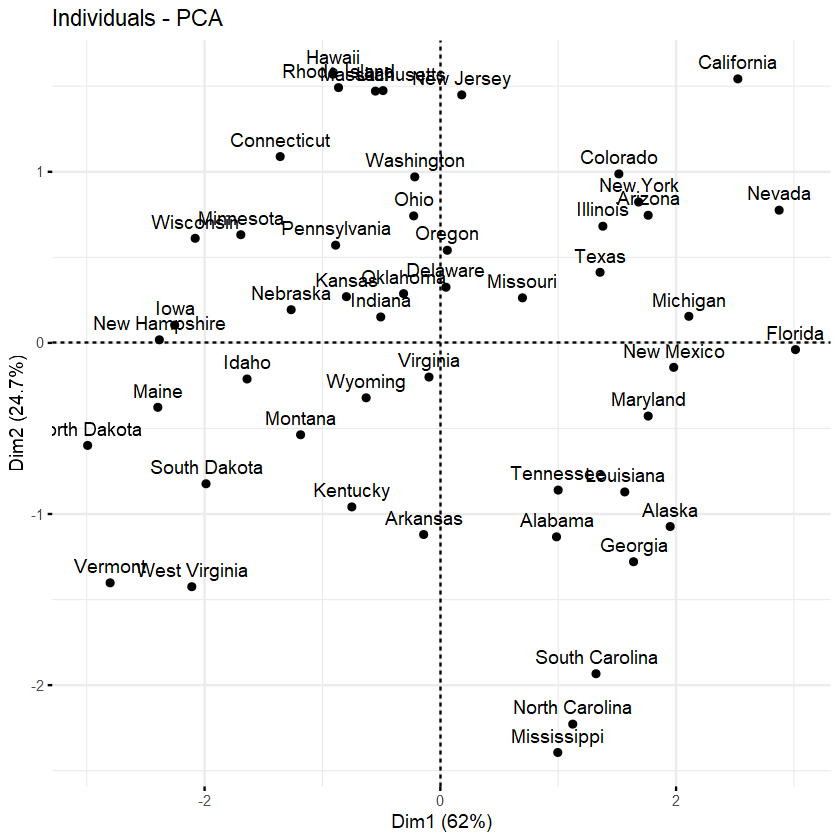

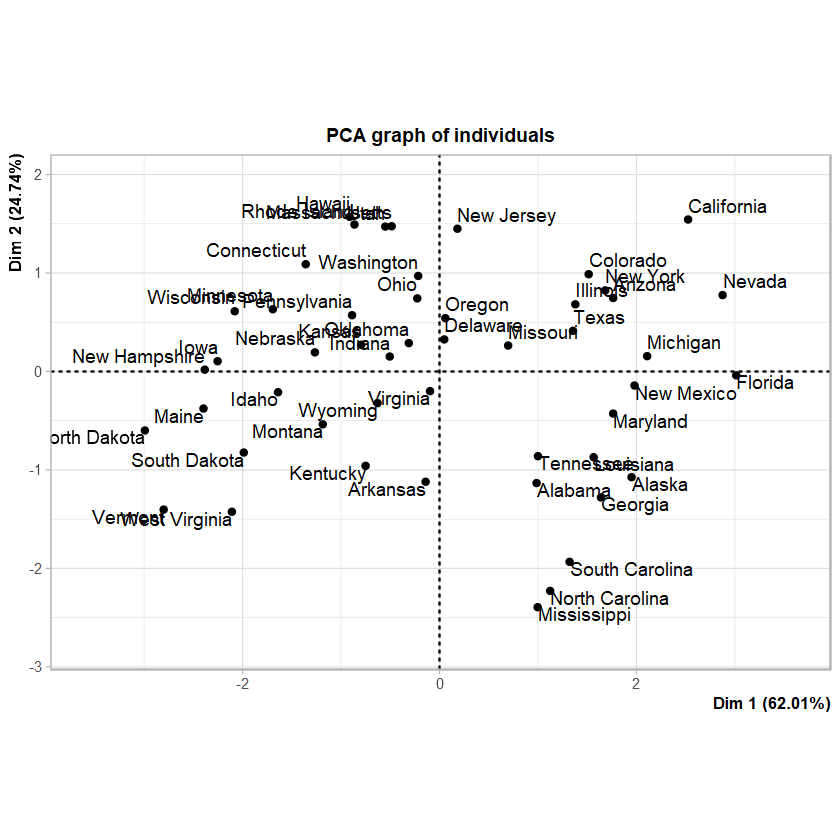

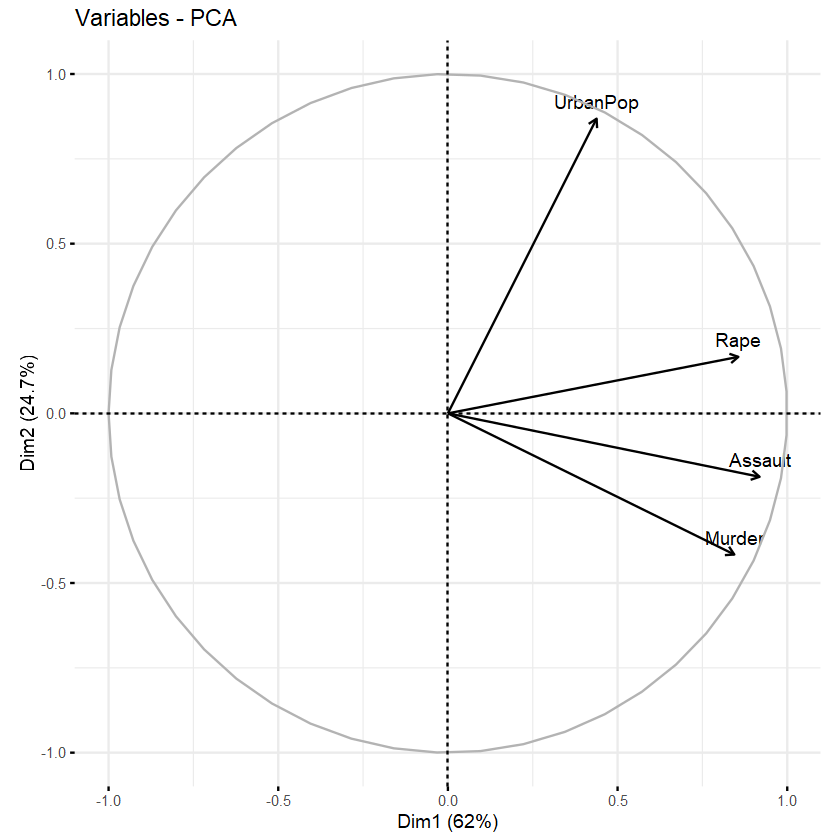

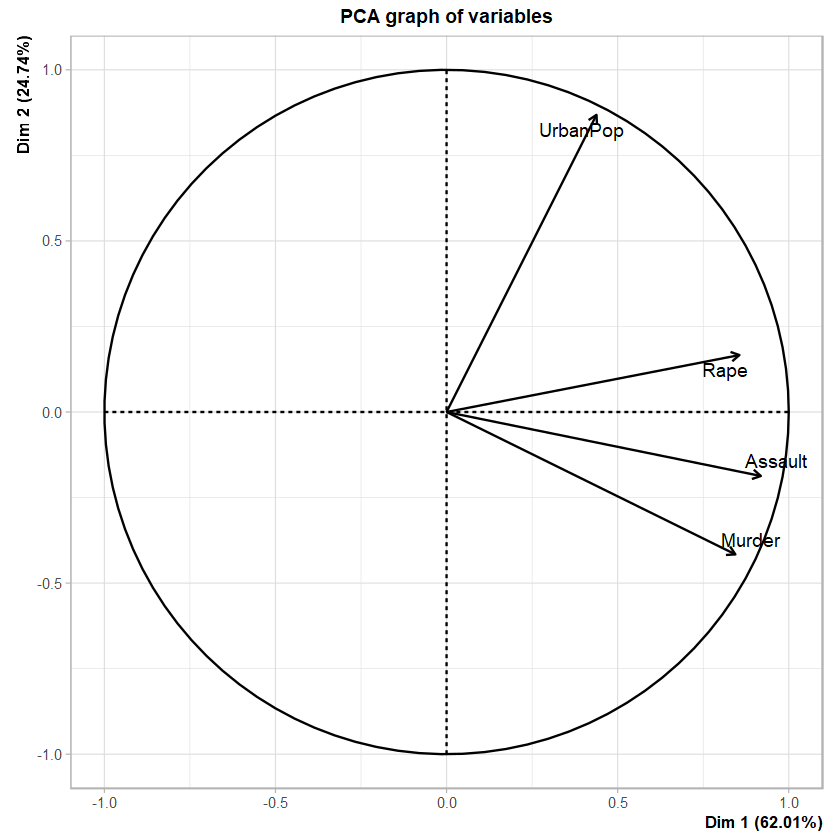

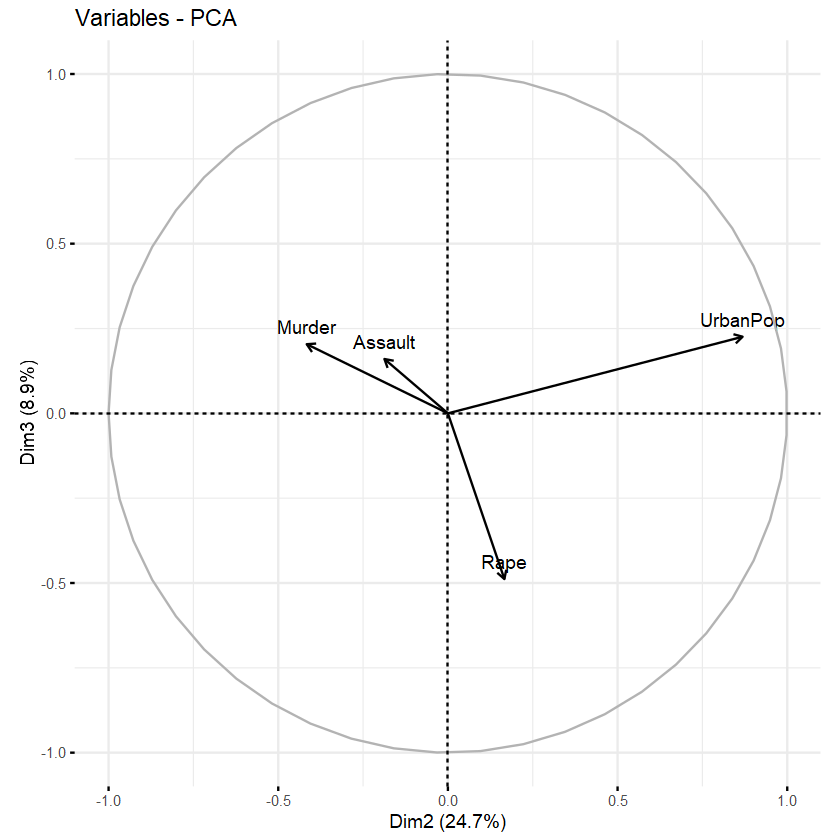

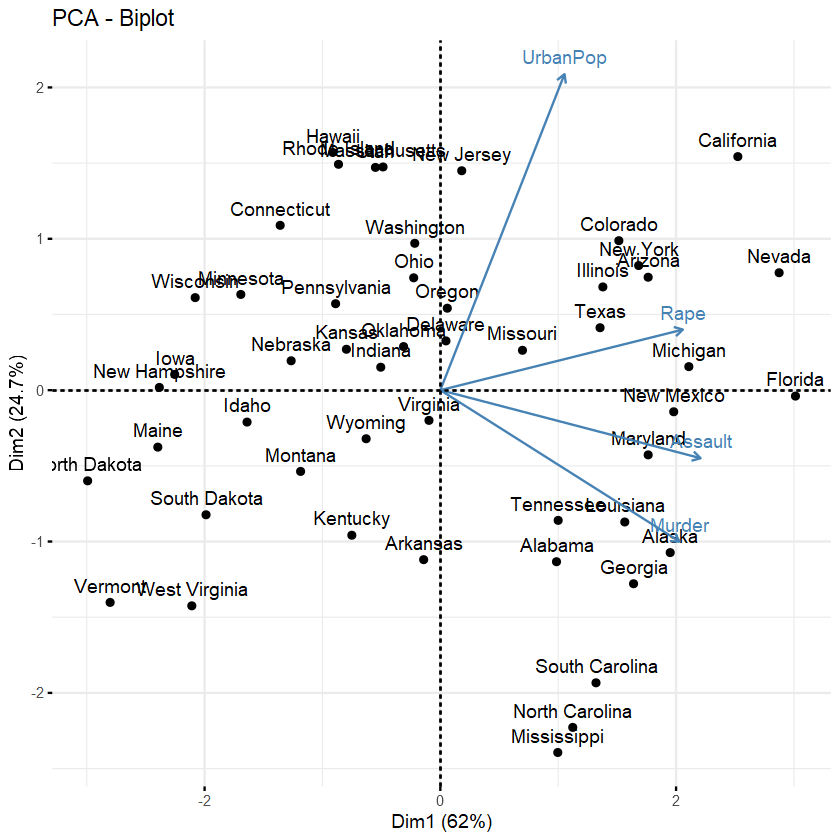

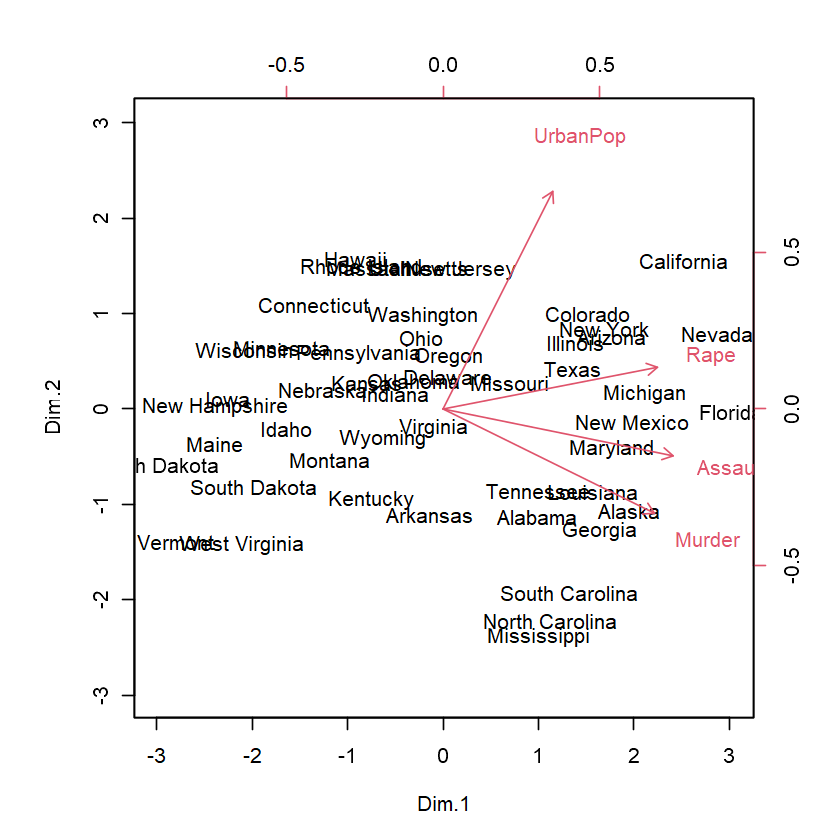

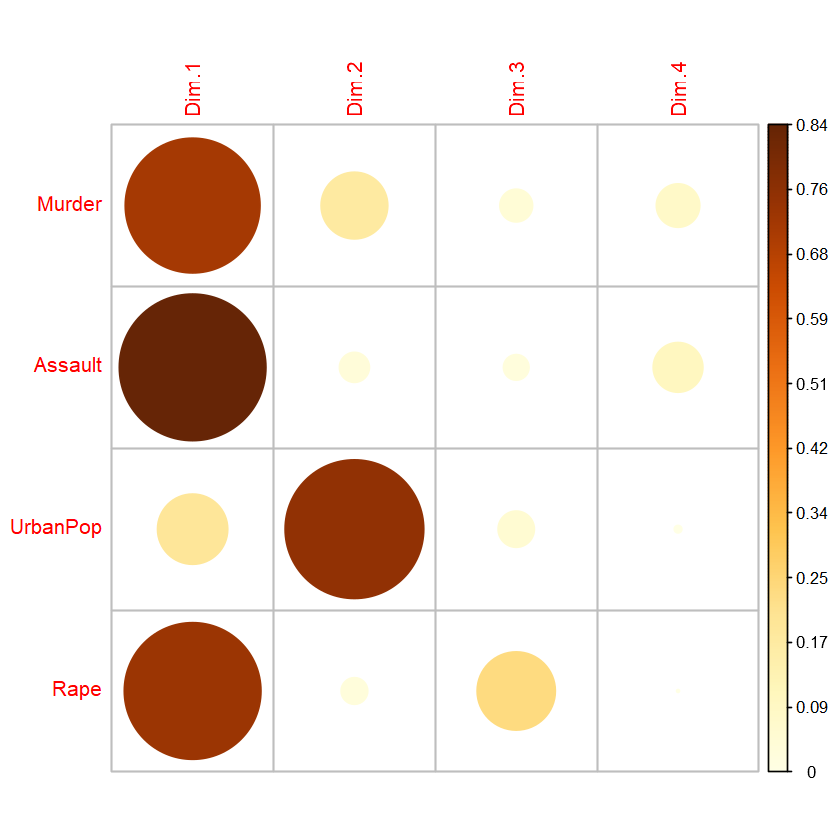

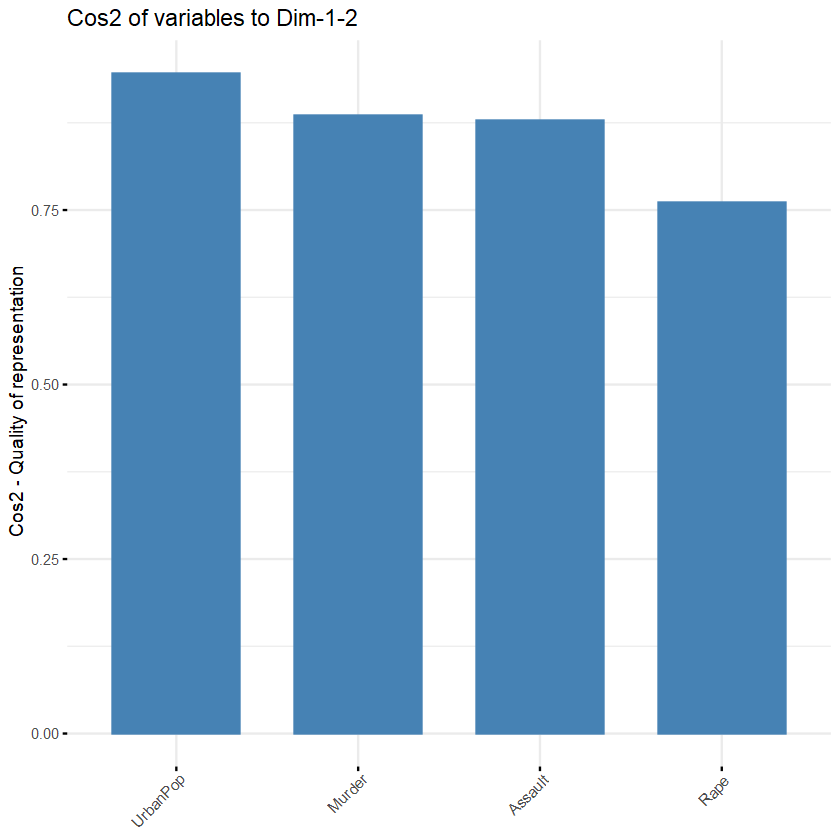

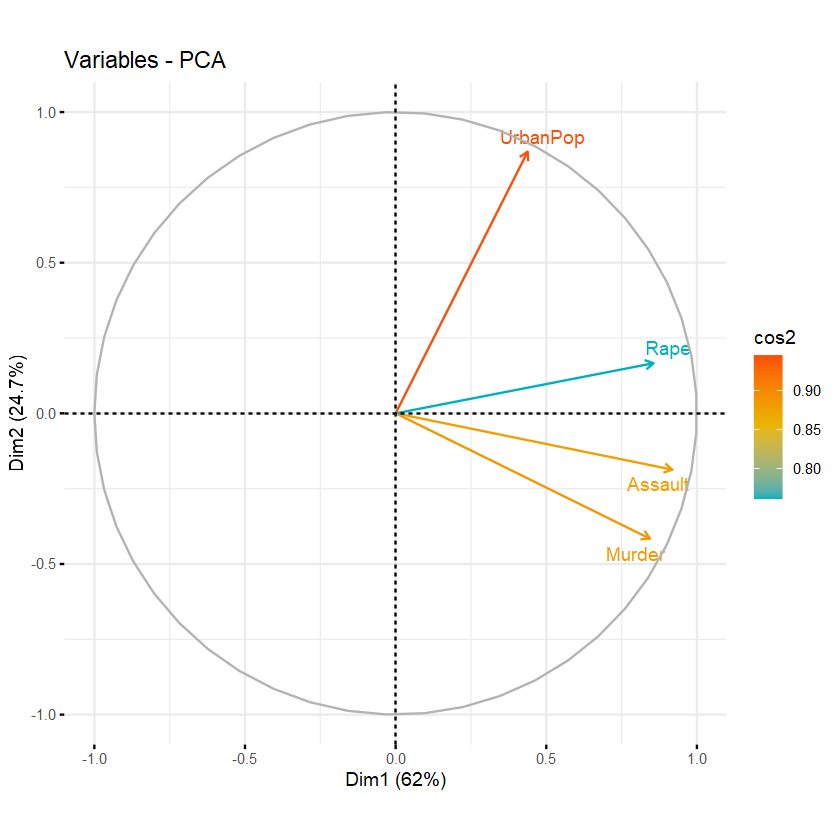

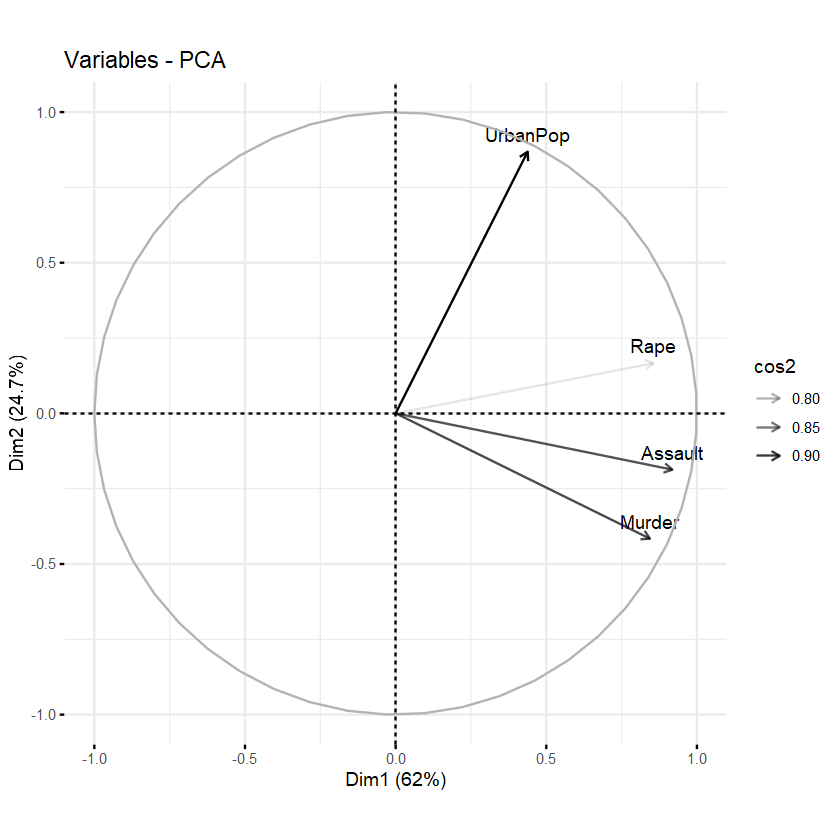

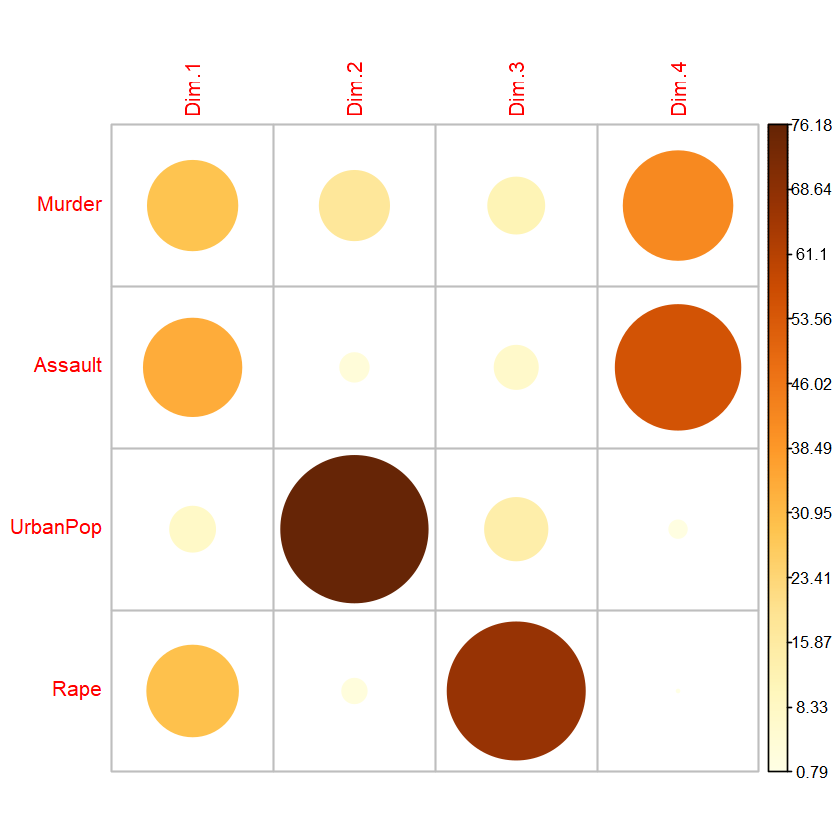

In [4]:
pca_out_pc <- PCA(X = USArrests, graph = F, ncp = 10)
names(pca_out_pc)
pca_out_pc$eig

# visiualize using function in factoextra 
get_eigenvalue(pca_out_pc) ### PVE is the same as above
## plot bar graph of PVE
fviz_eig(pca_out_pc)
fviz_screeplot(pca_out_pc, addlabels = T) ### an alias of fviz_eig()
## we can see the first two principal component can explain 84.7% of data

## view result for individuals and variables 
get_pca_ind(pca_out_pc)
get_pca_var(pca_out_pc)
## plot PCA graph of individuals in two ways
fviz_pca_ind(pca_out_pc) 
plot(pca_out_pc, choix = "ind") 
## plot PCA figure of variables using two methods
fviz_pca_var(pca_out_pc)
plot(pca_out_pc, choix = "var")
### in pc2 and pc3
fviz_pca_var(pca_out_pc, axes = c(2, 3))
## biplot and scatter plot of samples by two functions
fviz_pca_biplot(pca_out_pc)
biplot(pca_out_pc$ind$coord, pca_out_pc$var$coord)
## visualize cos2
corrplot(pca_out_pc$var$cos2, is.corr = F)
fviz_cos2(pca_out_pc, choice = "var", axes = 1: 2)

## PCA graph in variable 
### different color means different importance
fviz_pca_var(pca_out_pc, col.var = "cos2",
    gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    repel = TRUE ### avoid text overlapping
    )
### different transparency represents importance
fviz_pca_var(pca_out_pc, alpha.var = "cos2")

## plot contribution of variables
corrplot(pca_out_pc$var$contrib, is.corr = F)

### some other plot (using iris dataset)

note: ellipse.type can be

    1. convex: plot convex shape
	2. confidence: plot the confidence interval of the group average points, ellipse.level = 0.95 is default
	3. t: assume variable obey t distribution
	4. norm: normal distribution, default
	5. euclid: euclidean distance, circle

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa



    setosa versicolor  virginica 
        50         50         50 

[1] 150   5

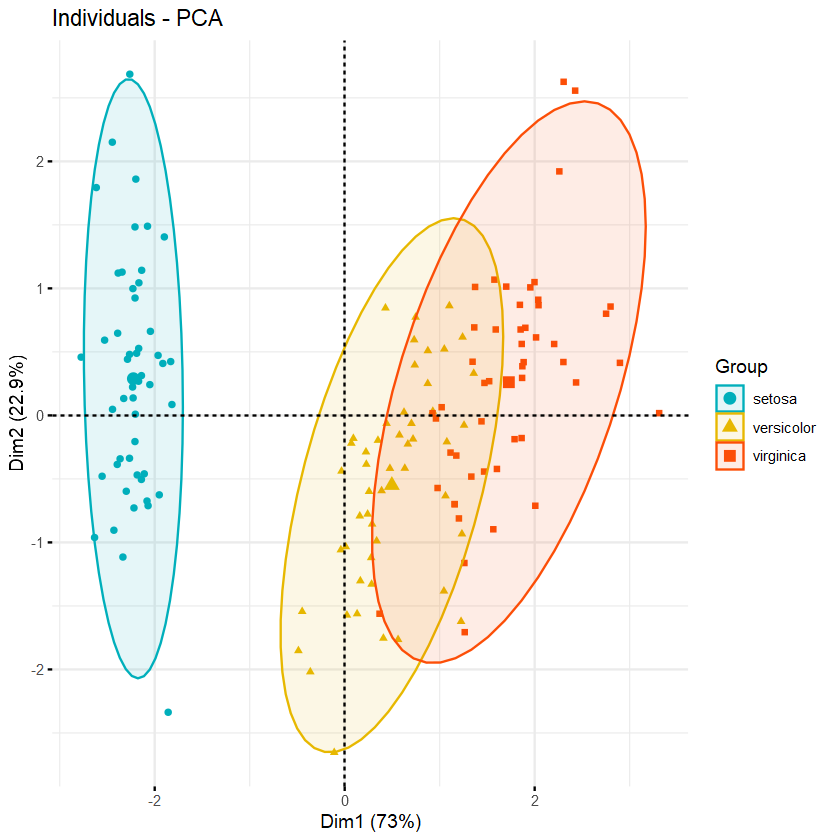

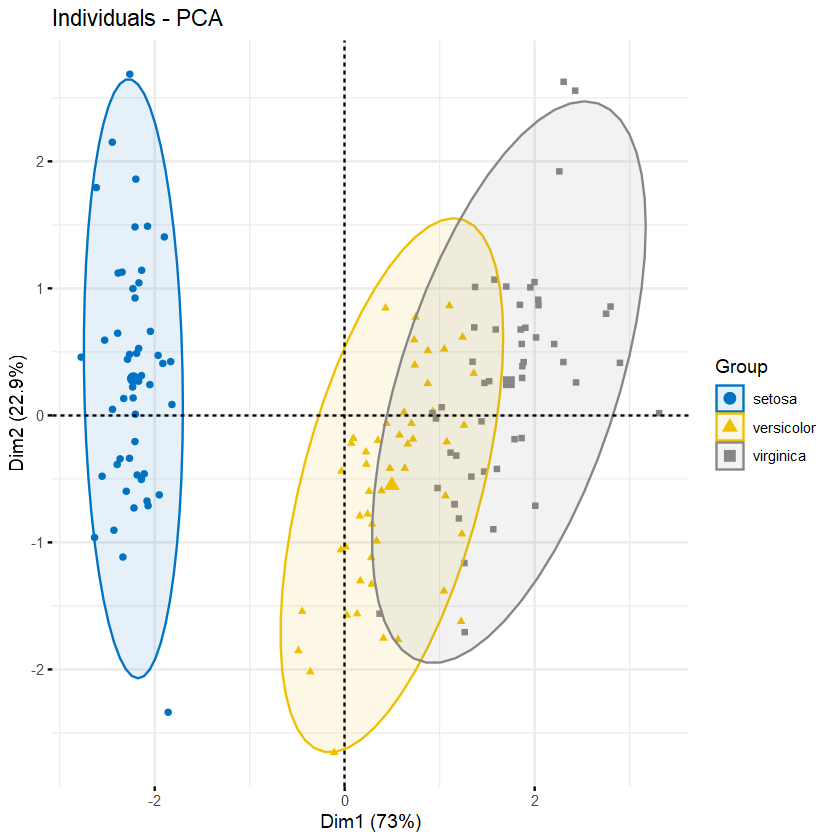

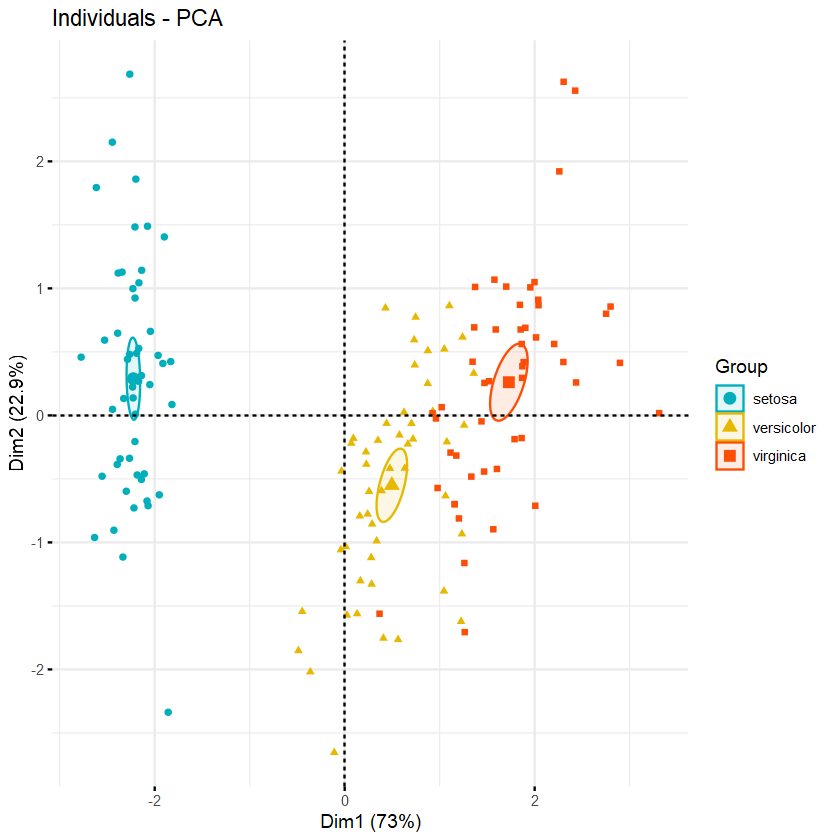

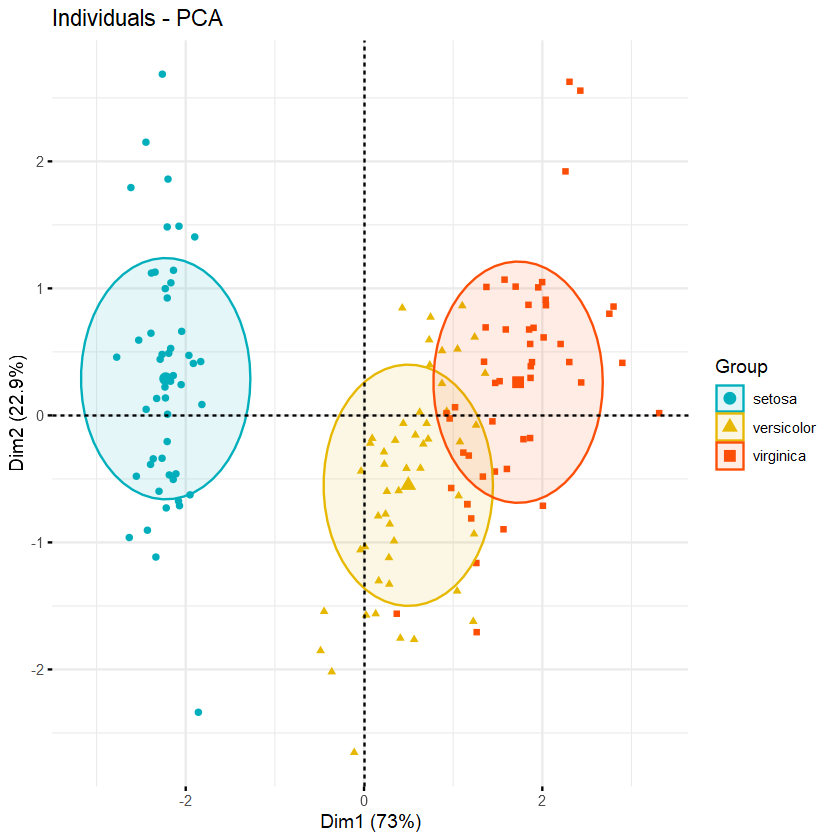

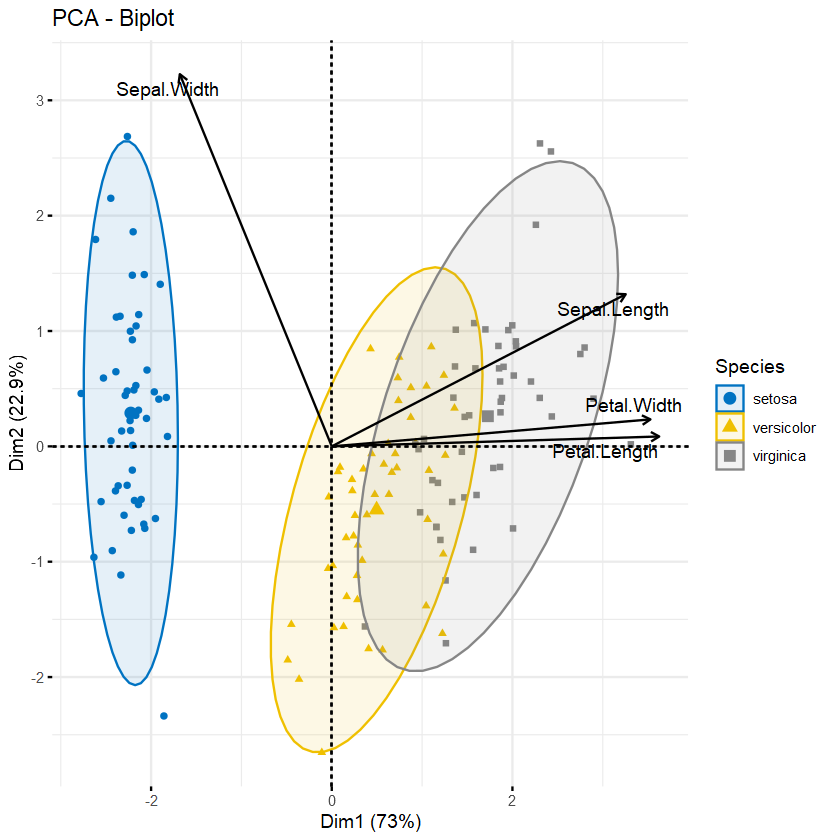

In [5]:
head(iris)
table(iris$Species)
dim(iris)

iris_pca <- PCA(iris[, -5], graph = F)

fviz_pca_ind(iris_pca, geom.ind = "point",
    col.ind = iris$Species,
    palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    addEllipses = T, legend.title = "Group")

fviz_pca_ind(iris_pca, geom.ind = "point",
    col.ind = iris$Species,
    palette = "jco",
    addEllipses = T, legend.title = "Group")

fviz_pca_ind(iris_pca, geom.ind = "point",
    col.ind = iris$Species,
    palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    addEllipses = T, ellipse.type = "confidence",
    ellipse.level = 0.95, # default 0.95 
    legend.title = "Group")
    
fviz_pca_ind(iris_pca, geom.ind = "point",
    col.ind = iris$Species,
    palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    addEllipses = T, ellipse.type = "euclid", 
    legend.title = "Group") 

# biplot
fviz_pca_biplot(iris_pca, col.ind = iris$Species,
	palette = "jco",
	addEllipses = T, label = "var",
	col.var = "black", repel = T,
	legend.title = "Species")


### explore why this two function have different PCs 

In [6]:
# example
df <- data.frame(F1 = c(1, 4, 1, 4, 5), 
    F2 = c(5, 2, 4, 4, 5), F3 = c(3, 6, 3, 1, 2),
    F4 = c(1, 3, 2, 1, 3))
## way1: by hand
### 1. standardise continuous initial variables
df_sca <- as.data.frame(scale(df))
### 2. compute the covariance matrix to identify correlations
df_sca_cov <- cov(df_sca)
### 3. compute the eigenvalues and eigenvectors of the covariance matrix
### to edentify the principal components
eigens <- eigen(df_sca_cov)
eigens$values
eigens$vectors
### 4. choose principal components from eigenvectors
#### generally, we choose the eigenvetors which have bigger eigenvalues
pcs <- as.matrix(eigens$vectors[, 1: 2])
### 5. recast the data along the principal components axes
df_aft <- as.matrix(df_sca) %*% pcs
### compute proportional of variance
pve <- eigens$values / sum(eigens$values)

## way2: prcomp function
pca_df1 <- prcomp(x = df, scale = T)
names(pca_df1)
pca_df1$rotation ### PCs == PCs in way1
pca_df1$x ### recasted data == way1
### compute pve
pve1 <- pca_df1$sdev ^ 2 / sum(pca_df1$sdev ^ 2) ### equal way1

## way3: PCA function
pca_df2 <- PCA(X = df, graph = F)
names(pca_df2)
pca_df2$eig ### eigenvalues and pve equal way1
pca_df2$var$coord ### do not equal way1
pca_df2$ind$coord ### do not euqal way 1

[1] 2.26076563 1.18888423 0.46537197 0.08497817

0.2952056,0.7810274,-0.3698121,-0.4075400
-0.5610370,0.2676812,0.6301853,-0.4652428
0.5525513,-0.4622677,0.1974522,-0.6648370
0.5410899,0.3234989,0.6535428,0.4188699


[1] "sdev"     "rotation" "center"   "scale"    "x"

,PC1,PC2,PC3,PC4
F1,0.2952056,0.7810274,-0.3698121,-0.4075400
F2,-0.5610370,0.2676812,0.6301853,-0.4652428
F3,0.5525513,-0.4622677,0.1974522,-0.6648370
F4,0.5410899,0.3234989,0.6535428,0.4188699


PC1,PC2,PC3,PC4
-1.314763,-0.9398916,0.2563470,-0.36306040
2.501107,-0.4374233,-0.2565904,-0.10534221
-0.315588,-0.8349534,0.3953458,0.43567863
-0.973998,0.5881627,-1.0623009,0.07403149
0.103242,1.6241056,0.6671986,-0.04130751


[1] "eig"  "var"  "ind"  "svd"  "call"

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.26076563,56.519141,56.51914
comp 2,1.18888423,29.722106,86.24125
comp 3,0.46537197,11.634299,97.87555
comp 4,0.08497817,2.124454,100.00000


,Dim.1,Dim.2,Dim.3,Dim.4
F1,0.4438665,0.8516008,-0.2522791,0.1188021
F2,-0.8435664,0.2918687,0.4299009,0.1356230
F3,0.8308074,-0.5040381,0.1346983,0.1938067
F4,0.8135742,0.3527302,0.4458350,-0.1221048


,Dim.1,Dim.2,Dim.3,Dim.4
1,-1.4699494,-1.0508308,0.2866047,0.40591386
2,2.7963223,-0.4890541,-0.2868768,0.11777617
3,-0.3528382,-0.9335063,0.4420100,-0.48710351
4,-1.0889629,0.6575859,-1.1876885,-0.08276972
5,0.1154281,1.8158052,0.7459507,0.04618320


Conclusion:    
The PCA function in FactoMineR and the prcomp function produce the same eigenvalues and pve. But they have different principal components (i.e. eigenvectors). It is right that eigenvalues are unique and eigenvectors are not.

## Clustering

### K-Means Clustering

             Length Class  Mode   
cluster      50     -none- numeric
centers       4     -none- numeric
totss         1     -none- numeric
withinss      2     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          2     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

1,3.3339737,-4.0761910
2,-0.1956978,-0.1848774


[1] 473.6179

[1] 63.20595 65.40068

[1] 345.0113

[1] 25 25

K-means clustering with 3 clusters of sizes 17, 23, 10

Cluster means:
        [,1]        [,2]
1  3.7789567 -4.56200798
2 -0.3820397 -0.08740753
3  2.3001545 -2.69622023

Clustering vector:
 [1] 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 2 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 25.74089 52.67700 19.56137
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

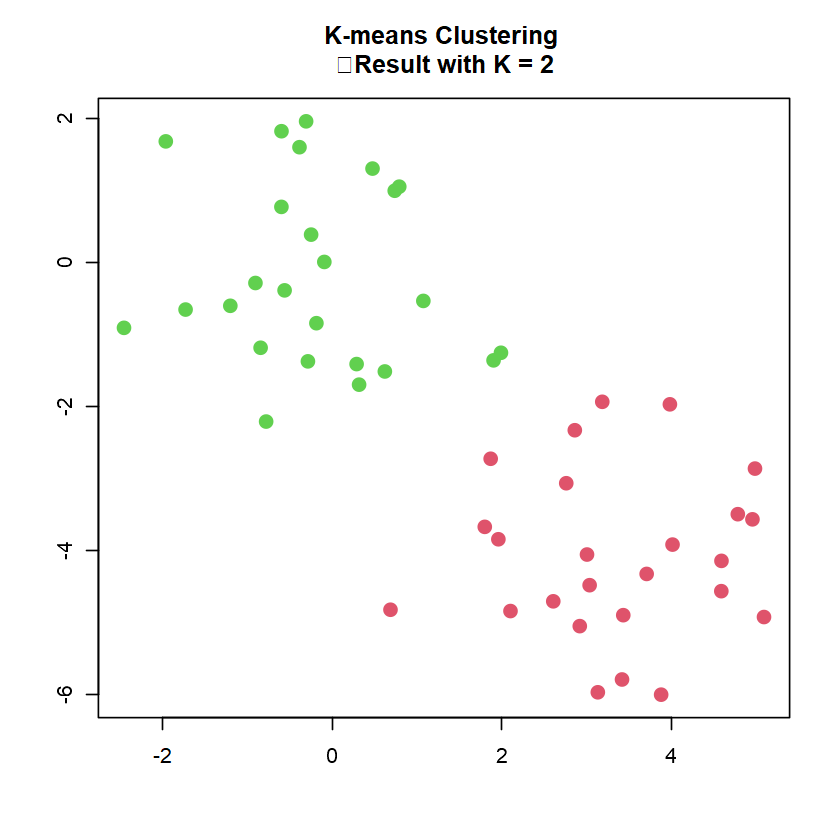

[1] 97.97927

[1] 97.97927

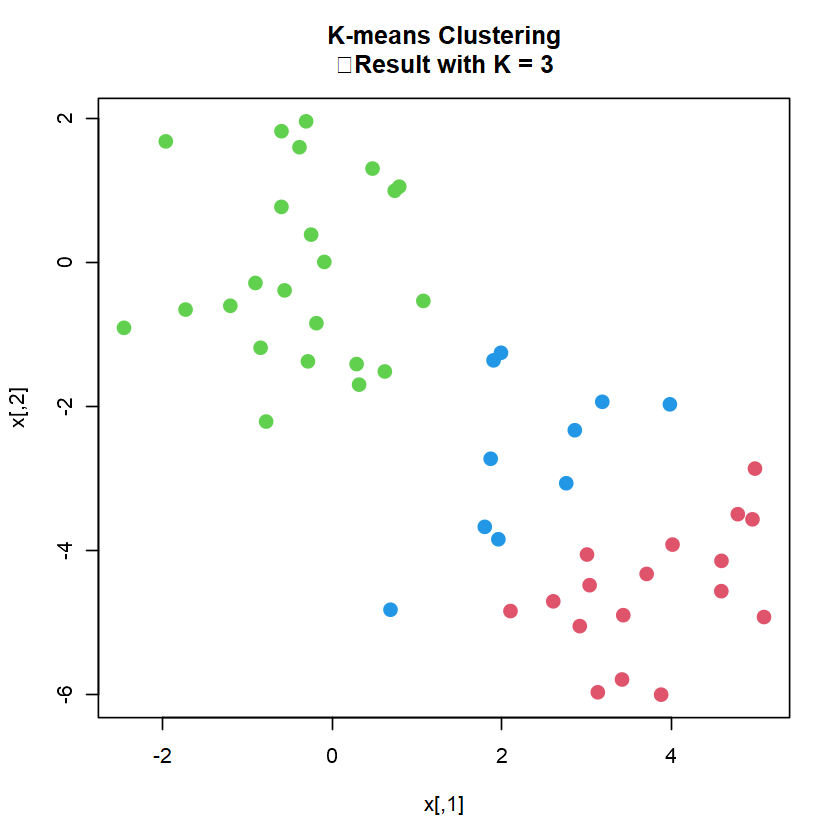

In [7]:
set.seed(2)
x <- matrix(rnorm(50 * 2), ncol = 2)
x[1: 25, 1] <- x[1: 25, 1] + 3
x[1: 25, 2] <- x[1: 25, 2] - 4

kmout <- kmeans(x = x, centers = 2, nstart = 20)
summary(kmout)
names(kmout)
## a vector of integers (from 1:k) indicating the cluster to which each point is allocated.
kmout$cluster
## a matrix of cluster centres.
kmout$center
## the total sum of squares
kmout$totss
## vector of within-cluster sum of squares, one component per cluster
kmout$withinss
## The between-cluster sum of squares
kmout$betweenss
## he number of points in each cluster.
kmout$size

plot(x, col = (kmout$cluster + 1), main = "K-means Clustering 
	Result with K = 2", xlab = "", ylab = "", pch = 20,
	cex = 2)

# perform K-means clustering on example above with K = 3
set.seed(4)
kmout1 <- kmeans(x = x, centers = 3, nstart = 20)
kmout1

plot(x, col = (kmout1$cluster + 1), main = "K-means Clustering
	Result with K = 3", pch = 20, cex = 2)

# if a value of nstart greater than one is used, then K-means 
# clustering will be performed using multiple random assignments
set.seed(0)
kmout2 <- kmeans(x = x, centers = 3, nstart = 1)
kmout2$tot.withinss
kmout3 <- kmeans(x = x, centers = 3, nstart = 20)
kmout3$tot.withinss

### Hierarchical Clustering


Call:
hclust(d = dist(x), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 


[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

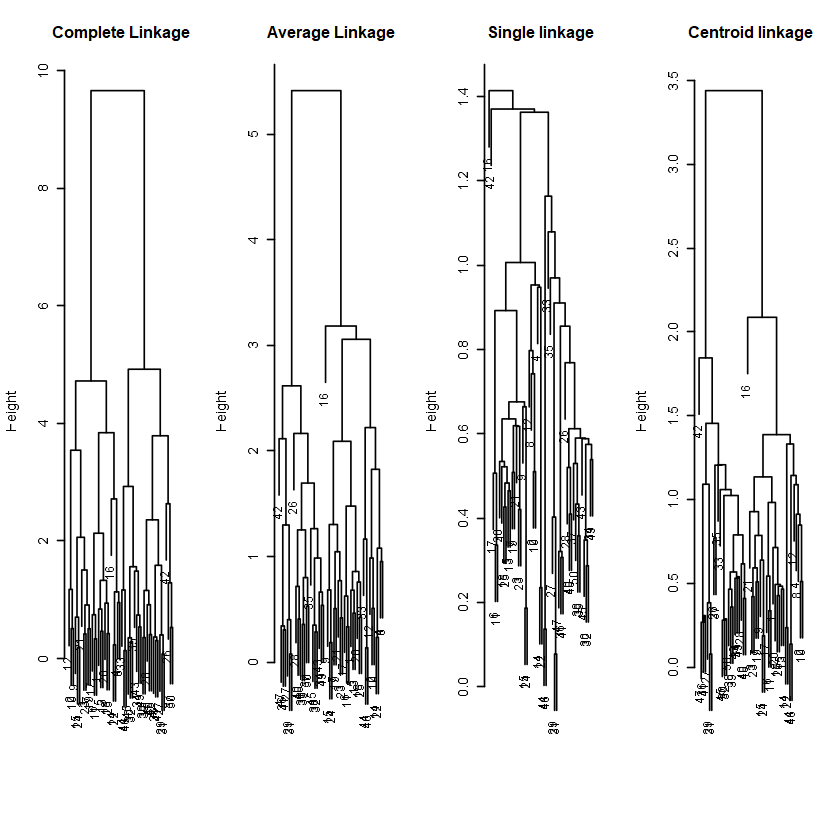

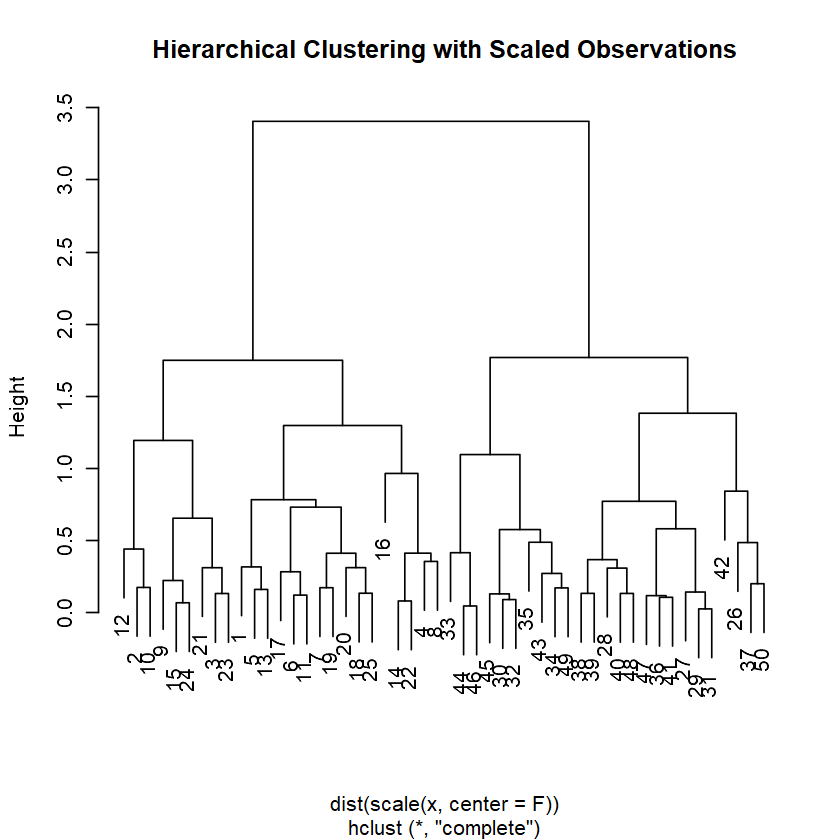

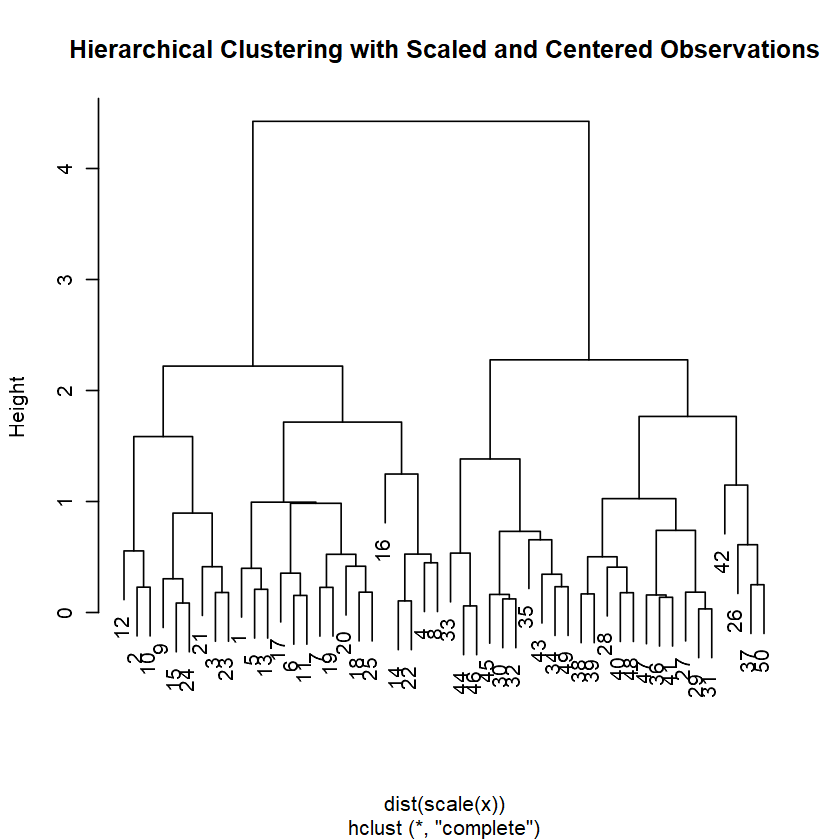

In [8]:
set.seed(2)
x <- matrix(rnorm(50 * 2), ncol = 2)
x[1: 25, 1] <- x[1: 25, 1] + 3
x[1: 25, 2] <- x[1: 25, 2] - 4

# do hierarchical clustering using various of method, 
# 	like 'complete', 'average', 'single'
## a dissimilarity structure as produced by 'dist'
hccom <- hclust(d = dist(x), method = "complete")
hccom
names(hccom)
## hccom$merge
## hccom$height
## hccom$order
hcavg <- hclust(d = dist(x), method = "average")
hcsing <- hclust(d = dist(x), method = "single")
hccen <- hclust(d = dist(x), method = "centroid")

# plot those dendrograms
par(mfrow = c(1, 4))
plot(hccom, main = "Complete Linkage",
	xlab = "", sub = "", cex = .9)
plot(hcavg, main = "Average Linkage",
	xlab = "", sub = "", cex = .9)
plot(hcsing, main = "Single linkage",
	xlab = "", sub = "", cex = .9)
plot(hccen, main = "Centroid linkage",
	xlab = "", sub = "", cex = .9)

# cut tree
cutree(tree = hccom, k = 2)
cutree(tree = hcavg, k = 2)
cutree(tree = hcsing, k = 2)
cutree(tree = hcsing, k = 4)
cutree(tree = hccen, k = 2)

# scale data for hierarchical clustering
par(mfrow = c(1, 1))
plot(hclust(dist(scale(x, center = F)), method = "complete"),
	main = "Hierarchical Clustering with Scaled Observations")
# centering the variables will not affect the Eulidean distance

plot(hclust(dist(scale(x)), method = "complete"), 
	main = "Hierarchical Clustering with Scaled and Centered Observations")


## NCI60 Data Example

### data processing

In [9]:
library(ISLR)
names(NCI60)
NCI60$labs
ncidat <- NCI60$data
ncilab <- NCI60$labs
dim(ncidat)
# colnames(ncidat)
rownames(ncidat)
ncilab[1: 4]
table(ncilab)

[1] "data" "labs"

[1] "CNS"         "CNS"         "CNS"         "RENAL"       "BREAST"     
 [6] "CNS"         "CNS"         "BREAST"      "NSCLC"       "NSCLC"      
[11] "RENAL"       "RENAL"       "RENAL"       "RENAL"       "RENAL"      
[16] "RENAL"       "RENAL"       "BREAST"      "NSCLC"       "RENAL"      
[21] "UNKNOWN"     "OVARIAN"     "MELANOMA"    "PROSTATE"    "OVARIAN"    
[26] "OVARIAN"     "OVARIAN"     "OVARIAN"     "OVARIAN"     "PROSTATE"   
[31] "NSCLC"       "NSCLC"       "NSCLC"       "LEUKEMIA"    "K562B-repro"
[36] "K562A-repro" "LEUKEMIA"    "LEUKEMIA"    "LEUKEMIA"    "LEUKEMIA"   
[41] "LEUKEMIA"    "COLON"       "COLON"       "COLON"       "COLON"      
[46] "COLON"       "COLON"       "COLON"       "MCF7A-repro" "BREAST"     
[51] "MCF7D-repro" "BREAST"      "NSCLC"       "NSCLC"       "NSCLC"      
[56] "MELANOMA"    "BREAST"      "BREAST"      "MELANOMA"    "MELANOMA"   
[61] "MELANOMA"    "MELANOMA"    "MELANOMA"    "MELANOMA"

[1]   64 6830

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32" "V33" "V34" "V35" "V36"
[37] "V37" "V38" "V39" "V40" "V41" "V42" "V43" "V44" "V45" "V46" "V47" "V48"
[49] "V49" "V50" "V51" "V52" "V53" "V54" "V55" "V56" "V57" "V58" "V59" "V60"
[61] "V61" "V62" "V63" "V64"

[1] "CNS"   "CNS"   "CNS"   "RENAL"

ncilab
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

### PCA on the NCI60 data

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

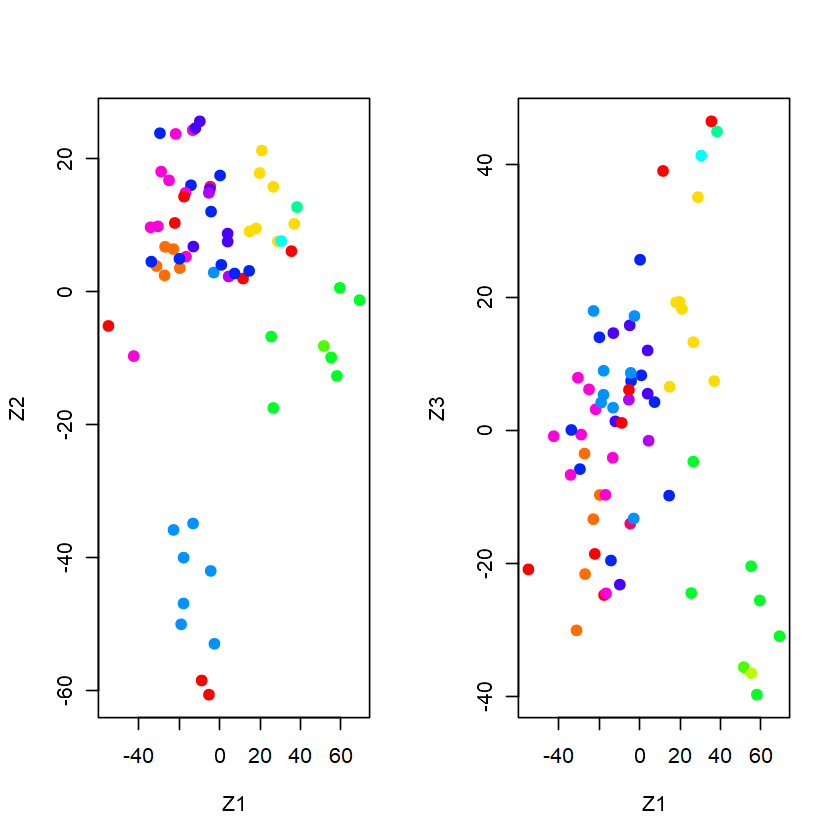

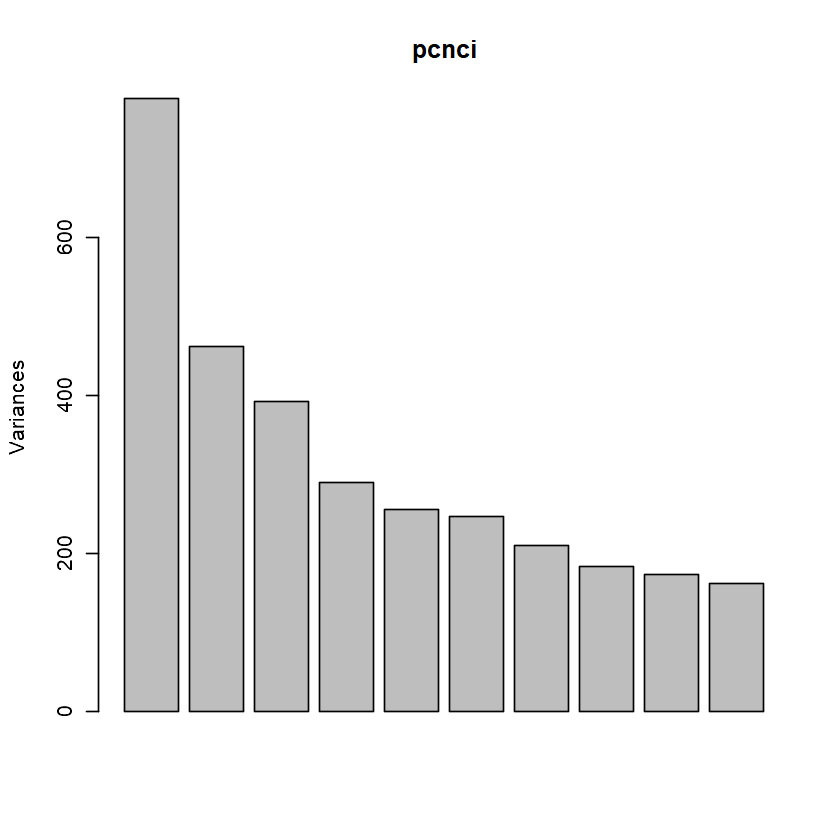

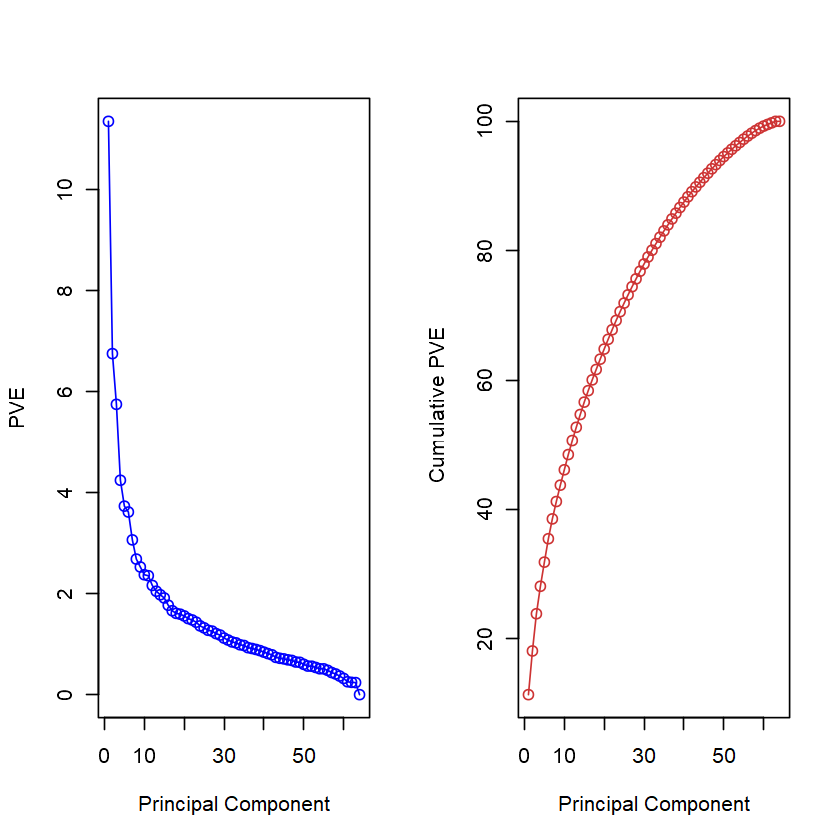

NULL

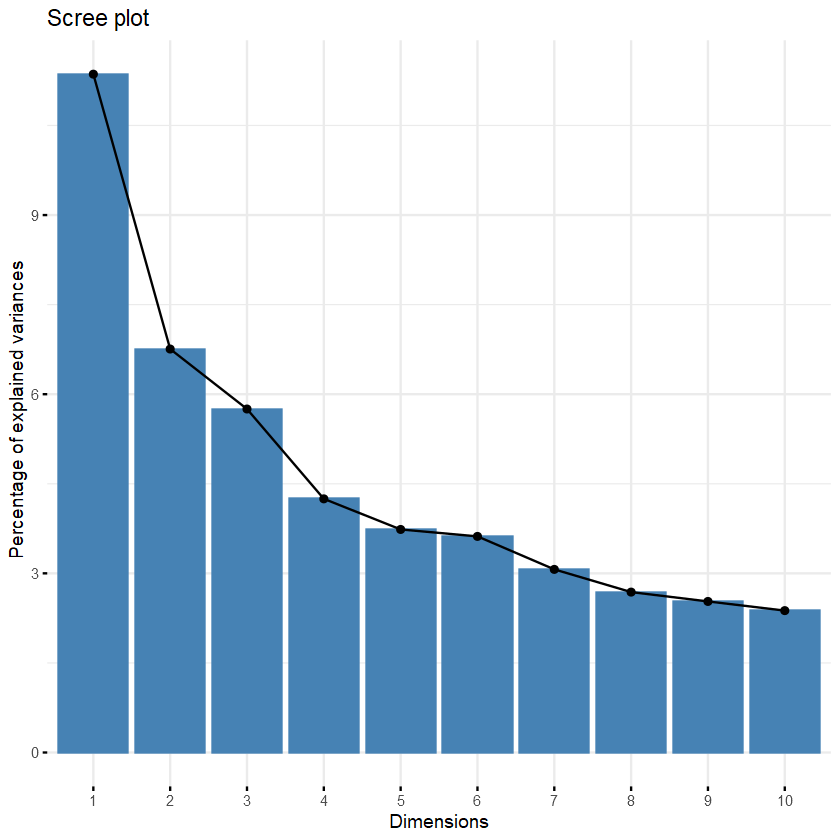

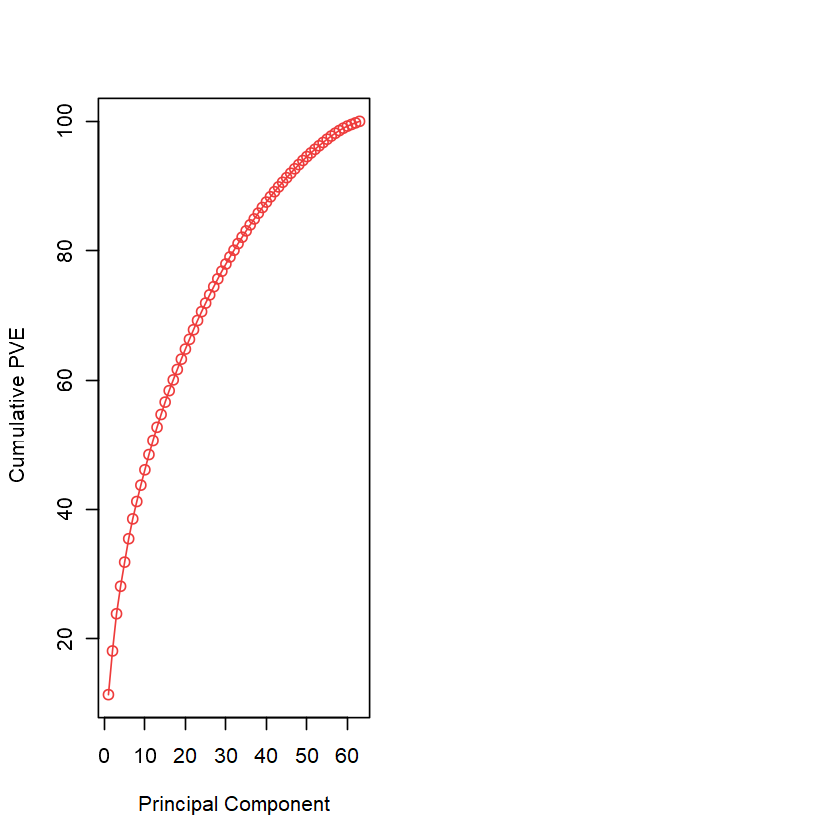

In [10]:
pcnci <- prcomp(ncidat, scale = T)

Cols <- function(vec){
	cols <- rainbow(length(unique(vec)))
	return(cols[as.factor(vec)])
}

par(mfrow = c(1, 2))
plot(pcnci$x[, 1: 2], col = Cols(ncilab),
	pch = 19, xlab = "Z1", ylab = "Z2")
plot(pcnci$x[, c(1, 3)], col = Cols(ncilab),
	pch = 19, xlab = "Z1", ylab = "Z3")

summary(pcnci)

par(mfrow = c(1, 1))
plot(pcnci)

pvenci <- 100 * pcnci$sdev^2 / sum(pcnci$sdev^2) 
par(mfrow = c(1, 2))
plot(pvenci, type = "o", ylab = "PVE", xlab = "Principal Component", col = "blue")
plot(cumsum(pvenci), type = "o", ylab = "Cumulative PVE", xlab = "Principal Component", col = "brown3")

pcnci1 <- PCA(X = ncidat, graph = F, ncp = 50)
fviz_eig(pcnci1)
# fviz_screeplot(pcnci1, addlabels = T) ### an alias of fviz_eig()
names(pcnci1$eig)
cmpve <- pcnci1$eig[, "cumulative percentage of variance"]
plot(cmpve, type = "o", ylab = "Cumulative PVE", xlab = "Principal Component", col = "brown2")

### clustering the Observations of NCI60 Ddata

#### hierarchical clustering

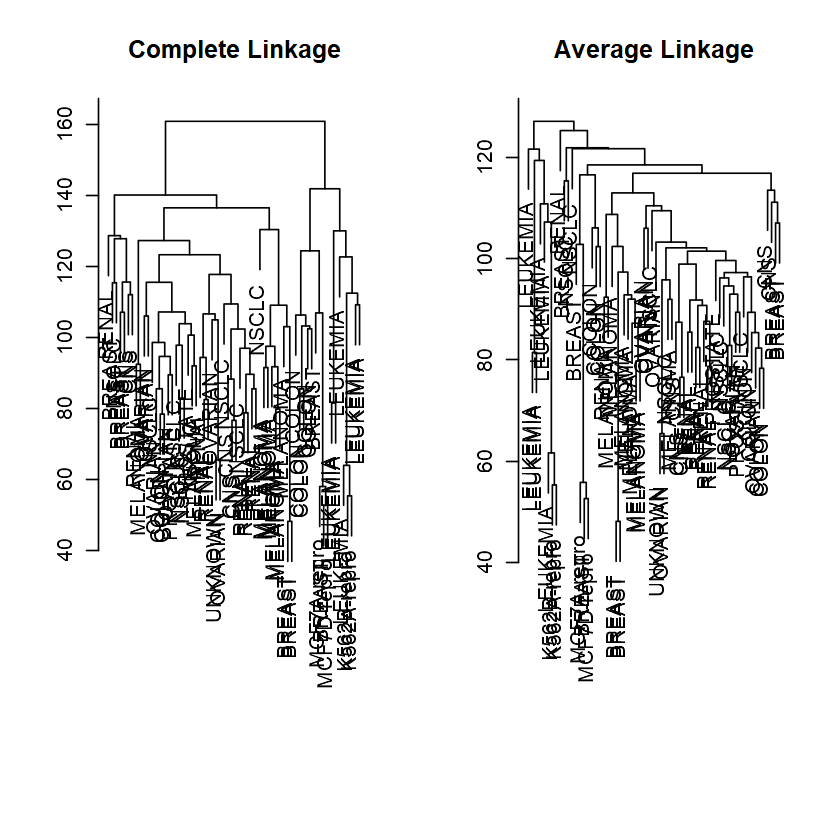

      ncilab
hcclus BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
     1      2   3     2           0           0        0           0
     2      3   2     0           0           0        0           0
     3      0   0     0           1           1        6           0
     4      2   0     5           0           0        0           1
      ncilab
hcclus MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
     1           0        8     8       6        2     8       1
     2           0        0     1       0        0     1       0
     3           0        0     0       0        0     0       0
     4           1        0     0       0        0     0       0

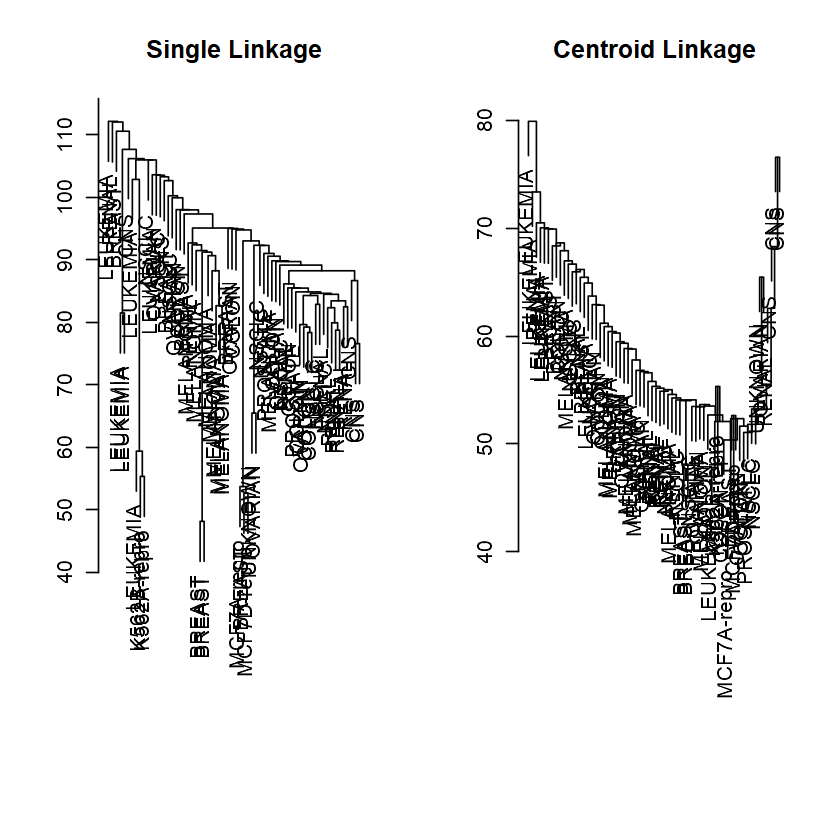

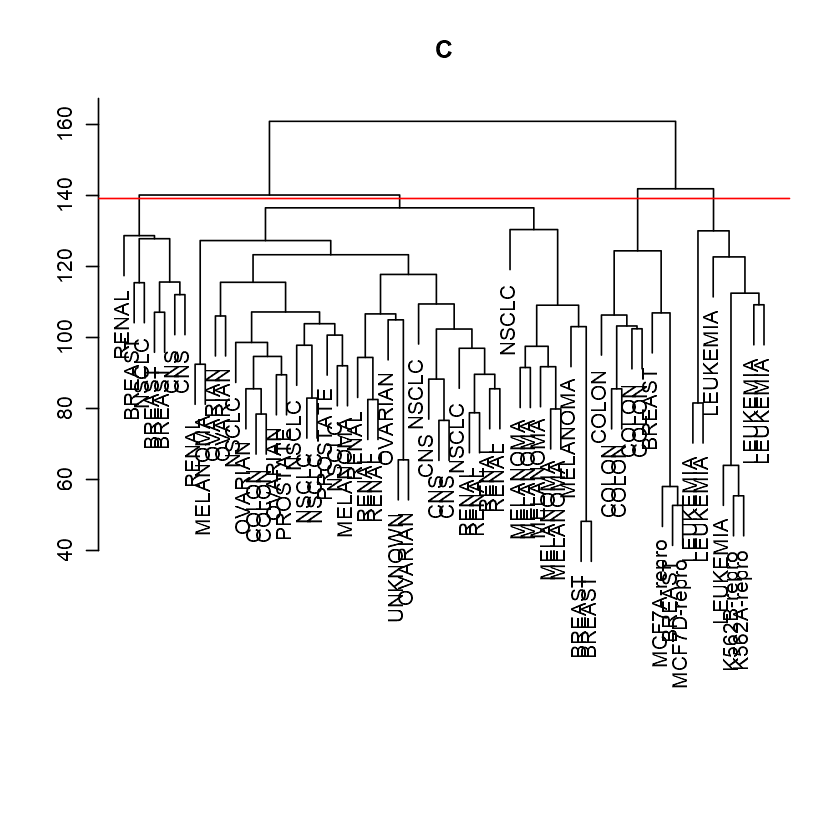

In [11]:
ncidatsca <- scale(x = ncidat, center = F, scale = T)

par(mfrow = c(1, 2))
datdist <- dist(ncidatsca)
plot(hclust(datdist, method = "complete"), labels = ncilab, main = "Complete Linkage", sub = "", xlab = "", ylab = "")
plot(hclust(datdist, method = "average"), labels = ncilab, main = "Average Linkage", sub = "", xlab = "", ylab = "")
plot(hclust(datdist, method = "single"), labels = ncilab, main = "Single Linkage", sub = "", xlab = "", ylab = "")
plot(hclust(datdist, method = "centroid"), labels = ncilab, main = "Centroid Linkage", sub = "", xlab = "", ylab = "")
## Typically, single and centroid linkage will tend to yield trailing clusters: very large clusters onto which 
## individual samples attach one-by-one
## Here, we choose complete linkage method to cut
hcc <- hclust(datdist, method = "complete")
hcclus <- cutree(hcc, 4)
table(hcclus, ncilab)

## how to identify the height of cutting 139?
par(mfrow = c(1, 1))
plot(hcc, labels = ncilab, main = "C", xlab = "", ylab = "", sub = "")
abline(h = 139, col = "red")

#### k-means

In [12]:
set.seed(2)
kmnci <- kmeans(x = ncidatsca, centers = 4, nstart = 20)
kmcc <- kmnci$cluster
table(kmcc, hcclus)
table(kmcc, ncilab)


    hcclus
kmcc  1  2  3  4
   1 11  0  0  9
   2 20  7  0  0
   3  9  0  0  0
   4  0  0  8  0

    ncilab
kmcc BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
   1      2   0     7           0           0        0           1           1
   2      3   5     0           0           0        0           0           0
   3      2   0     0           0           0        0           0           0
   4      0   0     0           1           1        6           0           0
    ncilab
kmcc MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
   1        0     5       3        1     0       0
   2        1     4       3        1     9       1
   3        7     0       0        0     0       0
   4        0     0       0        0     0       0

#### perform clustering (hierarchical & k-means) on the first few principal component score vectors

[1] "sdev"     "rotation" "center"   "scale"    "x"

   ncilab
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   ncilab
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

   ncilab
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      2   0     0           1           1        6           0           0
  2      0   0     7           0           0        0           0           0
  3      2   0     0           0           0        0           1           1
  4      3   5     0           0           0        0           0           0
   ncilab
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        7     1       0        0     0       0
  2        0     4       3        1     0       0
  3        0     0       0        0     0       0
  4        1     4       3        1     9       1

   
     1  2  3  4
  1  3  9  6  0
  2 15  0  0  0
  3  0  0  0  4
  4 16 11  0  0

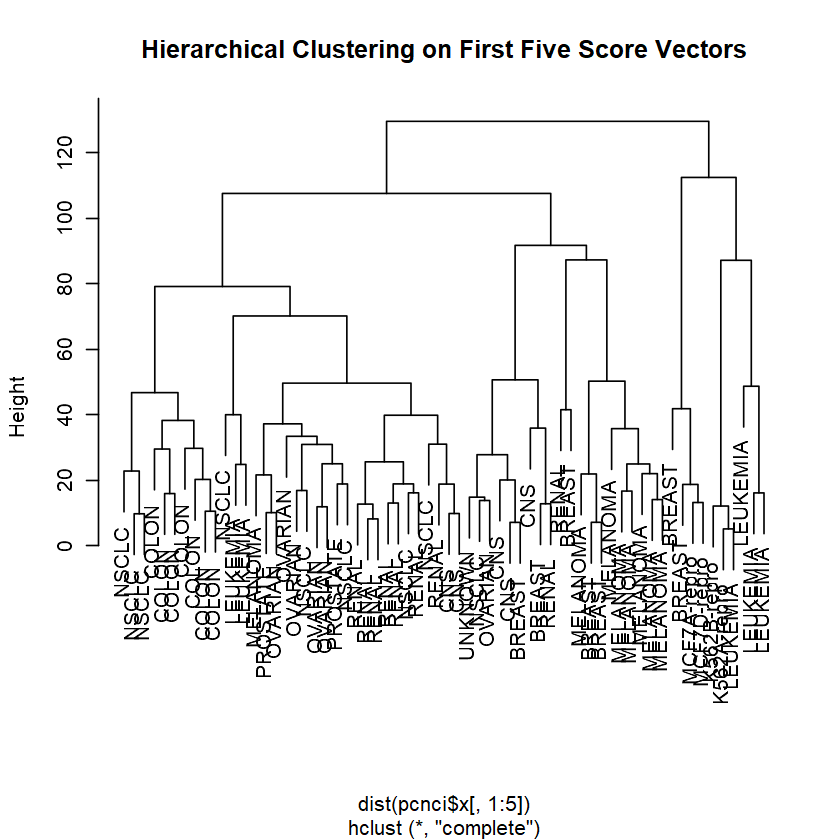

In [13]:
# hierarchical clustering 
names(pcnci)
hcpc <- hclust(dist(pcnci$x[, 1:5]))
plot(hcpc, labels = ncilab, main = "Hierarchical Clustering on First Five Score Vectors")
table(cutree(hcpc, 4), ncilab)

# k-means
kcpc <- kmeans(x = pcnci$x[, 1: 5], centers = 4)
# plot(x = pcnci$x[, 1:5], col = kcpc$cluster + 1, labels = ncilab)
table(kcpc$cluster, ncilab)
table(kcpc$cluster, cutree(hcpc, 4))

Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. In that situation, we might view the principal conponent step as one of denosising the data.